In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

# EDA
#import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE
from sklearn.metrics import *
from sklearn.model_selection import KFold, StratifiedKFold

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations

import gc
import re
from typing import List ,Dict, Tuple

# 한글 폰트 설정
from statsmodels import robust
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
SEED = 42

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

d_code = pd.read_csv('속성_D_코드.csv')
h_code = pd.read_csv('속성_H_코드.csv')
l_code = pd.read_csv('속성_L_코드.csv')

train.shape, test.shape

((501951, 35), (46404, 34))

## 데이터 살펴보기

In [4]:
train.iloc[:, :20].head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209


In [5]:
train.iloc[:, 20:].head()

,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


### D_code
- 코드 사이에 숫자가 밑의 코드로 갈린다
- 이걸 피처로 어떻게 나타낼 수 있을까

In [6]:
d_code.groupby('속성 D 대분류코드')['속성 D 중분류코드'].unique()

속성 D 대분류코드
1                                            [2, 56, 189]
216                             [217, 220, 231, 274, 297]
377                             [378, 439, 450, 473, 477]
482                                                 [482]
522                                            [523, 603]
618                        [619, 644, 659, 690, 708, 716]
744                                            [745, 824]
864                                                 [864]
926     [927, 1000, 1053, 1093, 1104, 1137, 1169, 1193...
1235                                               [1235]
1258                                               [1258]
Name: 속성 D 중분류코드, dtype: object

In [7]:
d_code.groupby('속성 D 중분류코드')['속성 D 소분류코드'].unique()

속성 D 중분류코드
2                              [3, 6, 16, 29, 37, 43]
56            [57, 58, 63, 72, 83, 91, 109, 123, 152]
189                                   [190, 197, 210]
217                                             [217]
220                                        [221, 224]
231                    [232, 238, 242, 258, 270, 273]
274                                             [274]
297     [298, 312, 315, 332, 340, 353, 356, 359, 368]
378                         [379, 382, 396, 397, 431]
439                                        [440, 446]
450                                   [451, 463, 470]
473                                             [473]
477                                             [477]
482               [483, 488, 489, 490, 494, 495, 509]
523               [524, 537, 540, 547, 560, 586, 600]
603                                             [603]
619                                        [620, 636]
644                              [645, 652, 655, 656]
659              

### H_code
* 중분류가 대분류에 이어지는 숫자 형태
* 대분류랑 코드는 D와 같은 형태인데 중분류가 너무 눈치없음

In [8]:
h_code

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3
...,...,...,...
289,309,566,308
290,310,567,308
291,311,568,308
292,313,569,312


In [9]:
h_code.groupby('속성 H 대분류코드')['속성 H 중분류코드'].unique()

속성 H 대분류코드
1                                                  [315]
3      [316, 317, 318, 319, 320, 321, 322, 323, 324, ...
30     [342, 343, 344, 345, 346, 347, 348, 349, 350, ...
48         [359, 360, 361, 362, 363, 364, 365, 366, 367]
58     [368, 369, 370, 371, 372, 373, 374, 375, 376, ...
71                        [379, 380, 381, 382, 383, 384]
78                        [385, 386, 387, 388, 389, 390]
85                        [391, 392, 393, 394, 395, 396]
92                                                 [397]
94     [398, 399, 400, 401, 402, 403, 404, 405, 406, ...
149    [432, 433, 434, 435, 436, 437, 438, 439, 440, ...
169    [451, 452, 453, 454, 455, 456, 457, 458, 459, ...
188    [463, 464, 465, 466, 467, 468, 469, 470, 471, ...
208    [480, 481, 482, 483, 484, 485, 486, 487, 488, ...
226    [495, 496, 497, 498, 499, 500, 501, 502, 503, ...
250    [518, 519, 520, 521, 522, 523, 524, 525, 526, ...
277    [542, 543, 544, 545, 546, 547, 548, 549, 550, ...
302                 

In [10]:
h_code.groupby('속성 H 대분류코드')['속성 H 코드'].unique()

속성 H 대분류코드
1                                                    [2]
3      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
30     [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...
48                  [49, 50, 51, 52, 53, 54, 55, 56, 57]
58      [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
71                              [72, 73, 74, 75, 76, 77]
78                              [79, 80, 81, 82, 83, 84]
85                              [86, 87, 88, 89, 90, 91]
92                                                  [93]
94     [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...
149    [150, 151, 152, 153, 154, 155, 156, 157, 158, ...
169    [170, 171, 172, 173, 174, 175, 176, 177, 178, ...
188    [189, 190, 191, 192, 193, 194, 195, 196, 197, ...
208    [209, 210, 211, 212, 213, 214, 215, 216, 217, ...
226    [227, 228, 229, 230, 231, 232, 233, 234, 235, ...
250    [251, 252, 253, 254, 255, 256, 257, 258, 259, ...
277    [278, 279, 280, 281, 282, 283, 284, 285, 286, ...
302                 

In [11]:
h_code.groupby('속성 H 중분류코드')['속성 H 코드'].unique()

속성 H 중분류코드
315      [2]
316      [4]
317      [5]
318      [6]
319      [7]
       ...  
566    [309]
567    [310]
568    [311]
569    [313]
570    [314]
Name: 속성 H 코드, Length: 256, dtype: object

### L_code

In [12]:
l_code.head()

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,1,1,1,1,2004
1,2,2,2,1,2004
2,3,3,2,1,2004
3,4,3,2,1,2004
4,5,5,2,1,2004


In [13]:
l_code.groupby('속성 L 대분류코드')['속성 L 중분류코드'].unique()

속성 L 대분류코드
2004                                    [1, 42, 53, 2004]
2005                               [67, 74, 81, 95, 2005]
2006    [99, 168, 183, 187, 229, 257, 272, 295, 321, 3...
2007                                          [869, 2007]
2008                           [887, 893, 901, 925, 2008]
2009                                     [930, 954, 2009]
2010                             [1003, 1021, 1152, 2010]
2011                       [1271, 1301, 1316, 1323, 2011]
2012                                   [1353, 1365, 2012]
2013           [1397, 1417, 1435, 1446, 1458, 1467, 2013]
2014                             [1480, 1504, 1522, 2014]
2015                                         [1538, 2015]
2016                       [1556, 1572, 1605, 1623, 2016]
2017                             [1645, 1658, 1688, 2017]
2018                                         [1713, 2018]
2019                                         [1752, 2019]
2020                                   [1810, 1832, 2020]
202

In [14]:
l_code.groupby('속성 L 중분류코드')['속성 L 소분류코드'].unique()

속성 L 중분류코드
1       [1, 2, 18, 30, 33, 39]
42                    [42, 43]
53                [53, 54, 60]
67                [67, 68, 71]
74                [74, 75, 78]
                 ...          
2021                    [2021]
2022                    [2022]
2023                    [2023]
2024                    [2024]
2025                    [2025]
Name: 속성 L 소분류코드, Length: 99, dtype: object

In [15]:
l_code.groupby('속성 L 소분류코드')['속성 L 세분류코드'].unique()

속성 L 소분류코드
1                        [1]
2       [2, 3, 5, 9, 12, 14]
18      [18, 19, 22, 24, 27]
30                  [30, 31]
33              [33, 34, 37]
                ...         
2021                  [2021]
2022                  [2022]
2023                  [2023]
2024                  [2024]
2025                  [2025]
Name: 속성 L 세분류코드, Length: 332, dtype: object

## preprocessing & engineering

### person_rn, contents_rn 활용

In [16]:
train['person_contents_mul'] = train['person_rn'] * train['contents_rn']
test['person_contents_mul'] = test['person_rn'] * test['contents_rn']

In [17]:
train['person_contents_sum'] = train['person_rn'] + train['contents_rn']
test['person_contents_sum'] = test['person_rn'] + test['contents_rn']

### contents_open_dt 관련

In [18]:
train['contents_open_dt'] = pd.to_datetime(train['contents_open_dt'])
test['contents_open_dt'] = pd.to_datetime(test['contents_open_dt'])

In [19]:
train['contents_open_hour'] = train['contents_open_dt'].dt.hour
test['contents_open_hour'] = test['contents_open_dt'].dt.hour

In [20]:
train_hour = train.groupby('contents_open_hour').target.sum() / train.groupby('contents_open_hour').target.size()
train['contents_open_hour'] = train['contents_open_hour'].apply(lambda x: train_hour[x])
test['contents_open_hour'] = test['contents_open_hour'].apply(lambda x: train_hour[x])

### 전처리
- 코드표 결합
- 같은 범주 일치 확인

In [21]:
d_code.columns = ['attribute_d', 'attribute_d_d', 'attribute_d_s', 'attribute_d_m', 'attribute_d_l']
h_code.columns = ['attribute_h', 'attribute_h_m', 'attribute_h_l']
l_code.columns = ['attribute_l', 'attribute_l_d', 'attribute_l_s', 'attribute_l_m', 'attribute_l_l']

In [22]:
def merge_codes(df : pd.DataFrame, 
                df_code : pd.DataFrame,
                col : str) -> pd.DataFrame:
    df = df.copy()
    df_code = df_code.copy()
    df_code = df_code.add_prefix(f"{col}_")
    df_code.columns.values[0] = col
    return pd.merge(df, df_code, how="left", on=col)

In [23]:
def preprocess_data(
                    df : pd.DataFrame, 
                    is_train : bool = True, 
                    cols_merge : List[Tuple[str, pd.DataFrame]] = [], 
                    cols_equi : List[Tuple[str, str]] = [] ,
                    cols_drop : List[str] = ['id', 'person_prefer_f', 'person_prefer_g', 'contents_open_dt']
                    ) -> Tuple[pd.DataFrame, np.ndarray]:
    df = df.copy()

    y_data = None
    if is_train:
        y_data = df['target'].to_numpy()
        df = df.drop(columns='target')

    for col, df_code in cols_merge:
        df = merge_codes(df, df_code, col)

    cols = df.select_dtypes(bool).columns.tolist()
    df[cols] = df[cols].astype(int)

    for col1, col2 in cols_equi:
        df[f'{col1}_{col2}'] = (df[col1] == df[col2]).astype(int)
        
    df = df.drop(columns=cols_drop)
    return (df, y_data)

In [24]:
# 소분류 중분류 대분류 속성코드 merge 컬럼명 및 데이터 프레임 리스트
cols_merge = [
              ('person_prefer_d_1', d_code),
              ('person_prefer_d_2', d_code),
              ('person_prefer_d_3', d_code),
              ('contents_attribute_d', d_code),
              ('person_prefer_h_1', h_code),
              ('person_prefer_h_2', h_code),
              ('person_prefer_h_3', h_code),
              ('contents_attribute_h', h_code),
              ('contents_attribute_l', l_code),
]

# 회원 속성과 콘텐츠 속성의 동일한 코드 여부에 대한 컬럼명 리스트
cols_equi = [

    ('contents_attribute_a', 'person_attribute_a'),
    ('contents_attribute_c', 'person_prefer_c'),
    ('contents_attribute_e', 'person_prefer_e'),

    ('person_prefer_d_1_attribute_d_s', 'contents_attribute_d_attribute_d_s'),
    ('person_prefer_d_1_attribute_d_m', 'contents_attribute_d_attribute_d_m'),
    ('person_prefer_d_2', 'contents_attribute_d'),
    ('person_prefer_d_2_attribute_d_d', 'contents_attribute_d_attribute_d_d'),
    ('person_prefer_d_2_attribute_d_s', 'contents_attribute_d_attribute_d_s'),
    ('person_prefer_d_2_attribute_d_m', 'contents_attribute_d_attribute_d_m'),
    ('person_prefer_d_2_attribute_d_l', 'contents_attribute_d_attribute_d_l'),
    ('person_prefer_d_3', 'contents_attribute_d'),
    ('person_prefer_d_3_attribute_d_d', 'contents_attribute_d_attribute_d_d'),
    ('person_prefer_d_3_attribute_d_s', 'contents_attribute_d_attribute_d_s'),
    ('person_prefer_d_3_attribute_d_m', 'contents_attribute_d_attribute_d_m'),
    ('person_prefer_d_3_attribute_d_l', 'contents_attribute_d_attribute_d_l'),

    ('person_prefer_h_2', 'contents_attribute_h'),
    ('person_prefer_h_2_attribute_h_m', 'contents_attribute_h_attribute_h_m'),
    ('person_prefer_h_2_attribute_h_l', 'contents_attribute_h_attribute_h_l'),
    ('person_prefer_h_3', 'contents_attribute_h'),
    ('person_prefer_h_3_attribute_h_m', 'contents_attribute_h_attribute_h_m'),
    ('person_prefer_h_3_attribute_h_l', 'contents_attribute_h_attribute_h_l'),

]

# 학습에 필요없는 컬럼 리스트
cols_drop = ['id', 'person_prefer_f', 'person_prefer_g', 'contents_rn', 'contents_open_dt', 'person_rn']

In [25]:
x_train, y_train = preprocess_data(train, cols_merge=cols_merge, cols_equi=cols_equi, cols_drop=cols_drop)
x_test, _ = preprocess_data(test, is_train=False, cols_merge=cols_merge, cols_equi=cols_equi, cols_drop=cols_drop)
x_train.shape, y_train.shape, x_test.shape

((501951, 80), (501951,), (46404, 80))

### 대중소세 코드 값 가지고 비교

In [26]:
# D : 대-중-소-세-d 일치여부 score
x_train['person_D_code1_score'] = (x_train['d_l_match_yn'] + x_train['person_prefer_d_1_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_train['person_prefer_d_1_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_train['d_m_match_yn'] + x_train['d_s_match_yn'])
x_train['person_D_code2_score'] = (x_train['person_prefer_d_2_attribute_d_l_contents_attribute_d_attribute_d_l'] + x_train['person_prefer_d_2_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_train['person_prefer_d_2_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_train['person_prefer_d_2_attribute_d_d_contents_attribute_d_attribute_d_d']\
                                + x_train['person_prefer_d_2_contents_attribute_d'])
x_train['person_D_code3_score'] = (x_train['person_prefer_d_3_attribute_d_l_contents_attribute_d_attribute_d_l'] + x_train['person_prefer_d_3_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_train['person_prefer_d_3_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_train['person_prefer_d_3_attribute_d_d_contents_attribute_d_attribute_d_d']\
                                + x_train['person_prefer_d_3_contents_attribute_d'])

x_test['person_D_code1_score'] =( x_test['d_l_match_yn'] + x_test['person_prefer_d_1_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_test['person_prefer_d_1_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_test['d_m_match_yn'] + x_test['d_s_match_yn'])
x_test['person_D_code2_score'] = (x_test['person_prefer_d_2_attribute_d_l_contents_attribute_d_attribute_d_l'] + x_test['person_prefer_d_2_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_test['person_prefer_d_2_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_test['person_prefer_d_2_attribute_d_d_contents_attribute_d_attribute_d_d']\
                                + x_test['person_prefer_d_2_contents_attribute_d'])
x_test['person_D_code3_score'] = (x_test['person_prefer_d_3_attribute_d_l_contents_attribute_d_attribute_d_l'] + x_test['person_prefer_d_3_attribute_d_m_contents_attribute_d_attribute_d_m'] \
                                + x_test['person_prefer_d_3_attribute_d_s_contents_attribute_d_attribute_d_s'] + x_test['person_prefer_d_3_attribute_d_d_contents_attribute_d_attribute_d_d']\
                                + x_test['person_prefer_d_3_contents_attribute_d'])

In [27]:
# H : 대-중-d 일치여부 score
x_train['person_H_code1_score'] = (x_train['h_l_match_yn'] + x_train['h_m_match_yn'] + x_train['h_s_match_yn'])
x_train['person_H_code2_score'] = (x_train['person_prefer_h_2_attribute_h_l_contents_attribute_h_attribute_h_l'] + x_train['person_prefer_h_2_attribute_h_m_contents_attribute_h_attribute_h_m']\
                                 + x_train['person_prefer_h_2_contents_attribute_h'])
x_train['person_H_code3_score'] = (x_train['person_prefer_h_3_attribute_h_l_contents_attribute_h_attribute_h_l'] + x_train['person_prefer_h_3_attribute_h_m_contents_attribute_h_attribute_h_m']\
                                 + x_train['person_prefer_h_3_contents_attribute_h'])

x_test['person_H_code1_score'] = (x_test['h_l_match_yn'] + x_test['h_m_match_yn']  + x_test['h_s_match_yn'])
x_test['person_H_code2_score'] = (x_test['person_prefer_h_2_attribute_h_l_contents_attribute_h_attribute_h_l'] + x_test['person_prefer_h_2_attribute_h_m_contents_attribute_h_attribute_h_m']\
                                 + x_test['person_prefer_h_2_contents_attribute_h'])
x_test['person_H_code3_score'] = (x_test['person_prefer_h_3_attribute_h_l_contents_attribute_h_attribute_h_l'] + x_test['person_prefer_h_3_attribute_h_m_contents_attribute_h_attribute_h_m']\
                                 + x_test['person_prefer_h_3_contents_attribute_h'])

In [28]:
x_train['content_L_code_sum'] = x_train['contents_attribute_l_attribute_l_l'] + x_train['contents_attribute_l_attribute_l_m'] \
                                + x_train['contents_attribute_l_attribute_l_s'] + x_train['contents_attribute_l_attribute_l_d']

x_test['content_L_code_sum'] = x_test['contents_attribute_l_attribute_l_l'] + x_test['contents_attribute_l_attribute_l_m'] \
                               + x_test['contents_attribute_l_attribute_l_s'] + x_test['contents_attribute_l_attribute_l_d']

In [29]:
x_train['D_H_1_mul'] = x_train['person_D_code1_score'] * x_train['person_H_code1_score']
x_train['D_H_2_mul'] = x_train['person_D_code2_score'] * x_train['person_H_code2_score']
x_train['D_H_3_mul'] = x_train['person_D_code3_score'] * x_train['person_H_code3_score']
x_train['D_H_1_sum'] = x_train['person_D_code1_score'] + x_train['person_H_code1_score']
x_train['D_H_2_sum'] = x_train['person_D_code2_score'] + x_train['person_H_code2_score']
x_train['D_H_3_sum'] = x_train['person_D_code3_score'] + x_train['person_H_code3_score']

x_test['D_H_1_mul'] = x_test['person_D_code1_score'] * x_test['person_H_code1_score']
x_test['D_H_2_mul'] = x_test['person_D_code2_score'] * x_test['person_H_code2_score']
x_test['D_H_3_mul'] = x_test['person_D_code3_score'] * x_test['person_H_code3_score']
x_test['D_H_1_sum'] = x_test['person_D_code1_score'] + x_test['person_H_code1_score']
x_test['D_H_2_sum'] = x_test['person_D_code2_score'] + x_test['person_H_code2_score']
x_test['D_H_3_sum'] = x_test['person_D_code3_score'] + x_test['person_H_code3_score']

In [30]:
x_train['DD_12_diff'] = x_train['person_D_code1_score'] - x_train['person_D_code2_score']
x_train['DD_13_diff'] = x_train['person_D_code1_score'] - x_train['person_D_code3_score']
x_train['DD_23_diff'] = x_train['person_D_code2_score'] - x_train['person_D_code3_score']

x_test['DD_12_diff'] = x_test['person_D_code1_score'] - x_test['person_D_code2_score']
x_test['DD_13_diff'] = x_test['person_D_code1_score'] - x_test['person_D_code3_score']
x_test['DD_23_diff'] = x_test['person_D_code2_score'] - x_test['person_D_code3_score']

In [31]:
x_train['HH_12_diff'] = x_train['person_H_code1_score'] - x_train['person_H_code2_score']
x_train['HH_13_diff'] = x_train['person_H_code1_score'] - x_train['person_H_code3_score']
x_train['HH_23_diff'] = x_train['person_H_code2_score'] - x_train['person_H_code3_score']

x_test['HH_12_diff'] = x_test['person_H_code1_score'] - x_test['person_H_code2_score']
x_test['HH_13_diff'] = x_test['person_H_code1_score'] - x_test['person_H_code3_score']
x_test['HH_23_diff'] = x_test['person_H_code2_score'] - x_test['person_H_code3_score']

In [32]:
x_train['DDD_sum'] = x_train['person_D_code1_score'] + x_train['person_D_code2_score'] + x_train['person_D_code3_score']
x_train['HHH_sum'] = x_train['person_H_code1_score'] + x_train['person_H_code2_score'] + x_train['person_H_code3_score']

x_test['DDD_sum'] = x_test['person_D_code1_score'] + x_test['person_D_code2_score'] + x_test['person_D_code3_score']
x_test['HHH_sum'] = x_test['person_H_code1_score'] + x_test['person_H_code2_score'] + x_test['person_H_code3_score']

In [33]:
x_train['person_contents_e_diff'] = x_train['person_prefer_e'] - x_train['contents_attribute_e']
x_test['person_contents_e_diff'] = x_test['person_prefer_e'] - x_test['contents_attribute_e']

In [34]:
x_train['D_E_1_mul'] = x_train['person_D_code1_score'] * x_train['person_contents_e_diff']
x_train['D_E_2_mul'] = x_train['person_D_code2_score'] * x_train['person_contents_e_diff']
x_train['D_E_3_mul'] = x_train['person_D_code3_score'] * x_train['person_contents_e_diff']
x_train['D_E_1_sum'] = x_train['person_D_code1_score'] + x_train['person_contents_e_diff']
x_train['D_E_2_sum'] = x_train['person_D_code2_score'] + x_train['person_contents_e_diff']
x_train['D_E_3_sum'] = x_train['person_D_code3_score'] + x_train['person_contents_e_diff']

x_test['D_E_1_mul'] = x_test['person_D_code1_score'] * x_test['person_contents_e_diff']
x_test['D_E_2_mul'] = x_test['person_D_code2_score'] * x_test['person_contents_e_diff']
x_test['D_E_3_mul'] = x_test['person_D_code3_score'] * x_test['person_contents_e_diff']
x_test['D_E_1_sum'] = x_test['person_D_code1_score'] + x_test['person_contents_e_diff']
x_test['D_E_2_sum'] = x_test['person_D_code2_score'] + x_test['person_contents_e_diff']
x_test['D_E_3_sum'] = x_test['person_D_code3_score'] + x_test['person_contents_e_diff']

In [35]:
x_train['H_E_1_mul'] = x_train['person_H_code1_score'] * x_train['person_contents_e_diff']
x_train['H_E_2_mul'] = x_train['person_H_code2_score'] * x_train['person_contents_e_diff']
x_train['H_E_3_mul'] = x_train['person_H_code3_score'] * x_train['person_contents_e_diff']
x_train['H_E_1_sum'] = x_train['person_H_code1_score'] + x_train['person_contents_e_diff']
x_train['H_E_2_sum'] = x_train['person_H_code2_score'] + x_train['person_contents_e_diff']
x_train['H_E_3_sum'] = x_train['person_H_code3_score'] + x_train['person_contents_e_diff']

x_test['H_E_1_mul'] = x_test['person_H_code1_score'] * x_test['person_contents_e_diff']
x_test['H_E_2_mul'] = x_test['person_H_code2_score'] * x_test['person_contents_e_diff']
x_test['H_E_3_mul'] = x_test['person_H_code3_score'] * x_test['person_contents_e_diff']
x_test['H_E_1_sum'] = x_test['person_H_code1_score'] + x_test['person_contents_e_diff']
x_test['H_E_2_sum'] = x_test['person_H_code2_score'] + x_test['person_contents_e_diff']
x_test['H_E_3_sum'] = x_test['person_H_code3_score'] + x_test['person_contents_e_diff']

In [36]:
x_train['L_E_mul'] = x_train['content_L_code_sum'] * x_train['person_contents_e_diff']
x_train['L_E_sum'] = x_train['content_L_code_sum'] + x_train['person_contents_e_diff']

x_test['L_E_mul'] = x_test['content_L_code_sum'] * x_test['person_contents_e_diff']
x_test['L_E_sum'] = x_test['content_L_code_sum'] + x_test['person_contents_e_diff']

### J assemble

In [37]:
data = pd.concat([x_train, train.target],axis=1)

In [38]:
a= pd.pivot_table(data, values='target',index='contents_attribute_j',
    columns='contents_attribute_j_1',
    aggfunc='sum', fill_value=0)

In [39]:
b= pd.pivot_table(data, values='target',index='contents_attribute_j',
    columns='contents_attribute_j_1',
    aggfunc='count', fill_value=0)

In [40]:
a/b

contents_attribute_j_1,1,2,3,4,5,6,8,9,10
contents_attribute_j,,,,,,,,,
1,0.615385,0.093927,0.32543,0.530409,0.527519,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.487139,0.437956,0.431964,0.472427


In [41]:
x_train['j_assemble']=x_train['contents_attribute_j'] * x_train['contents_attribute_j_1']
x_test['j_assemble']=x_test['contents_attribute_j'] * x_test['contents_attribute_j_1']

In [42]:
x_train['a_assemble']=x_train['person_attribute_a'].astype(str) + '_' + x_train['contents_attribute_a'].astype(str)
x_test['a_assemble']=x_test['person_attribute_a'].astype(str) + '_' + x_test['contents_attribute_a'].astype(str)

### D assemble
- contents_d 와 person_d의 관계를 보기 위해 pivot_table을 이용하여 target encoding을 만듦

D_1_L assemble

In [43]:
a= pd.pivot_table(data, values='target',index='person_prefer_d_1_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='sum', fill_value=0)

In [44]:
b= pd.pivot_table(data, values='target',index='person_prefer_d_1_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='count', fill_value=0)

In [45]:
ab=(a/b).fillna(0)
ab

contents_attribute_d_attribute_d_l,1,216,377,482,522,618,744,864,926,1235,1258
person_prefer_d_1_attribute_d_l,,,,,,,,,,,
1,0.577416,0.348087,0.292436,0.275927,0.326954,0.283027,0.431737,0.313196,0.372367,0.170455,0.25
216,0.524900,0.598649,0.259259,0.321429,0.505848,0.379648,0.394518,0.465668,0.472571,0.273810,0.00
377,0.501129,0.286765,0.505151,0.307004,0.415954,0.330265,0.383857,0.246269,0.347168,0.089286,0.00
482,0.487420,0.291429,0.293035,0.625022,0.239437,0.323583,0.342105,0.196429,0.332207,0.172414,0.00
522,0.560093,0.493617,0.338290,0.255814,0.660348,0.415686,0.556684,0.430233,0.476839,0.333333,0.00
618,0.498507,0.362729,0.315197,0.349638,0.319444,0.579576,0.470266,0.440068,0.467452,0.373239,0.00
744,0.527941,0.353226,0.241960,0.292419,0.364179,0.431117,0.560200,0.431910,0.444589,0.393782,0.00
864,0.476625,0.487385,0.277108,0.263158,0.571429,0.408696,0.517885,0.589229,0.501591,0.388060,0.00
926,0.420474,0.396458,0.183044,0.215447,0.247984,0.345951,0.406093,0.414907,0.502301,0.280255,0.00


In [46]:
d_1_l_target = []
for i in range(11):
    d_1_l_target.append(list(ab.iloc[i,:] + ab.iloc[:,i]))
d_1_l_target= pd.DataFrame(d_1_l_target, columns=list(ab.columns))
d_1_l_target.index = list(ab.columns)

In [47]:
x_train['d_1_l_target']=0
x_test['d_1_l_target']=0

D_2_L assemble

In [48]:
a= pd.pivot_table(data, values='target',index='person_prefer_d_2_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='sum', fill_value=0)

In [49]:
b= pd.pivot_table(data, values='target',index='person_prefer_d_2_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='count', fill_value=0)

In [50]:
ab=(a/b).fillna(0)
ab

contents_attribute_d_attribute_d_l,1,216,377,482,522,618,744,864,926,1235,1258
person_prefer_d_2_attribute_d_l,,,,,,,,,,,
1,0.576027,0.396947,0.332855,0.372775,0.348470,0.279459,0.450208,0.297393,0.373357,0.180828,0.333333
216,0.534165,0.610883,0.248031,0.320000,0.579869,0.396226,0.403592,0.485549,0.472514,0.229167,0.000000
377,0.519663,0.291284,0.491415,0.578765,0.373377,0.296623,0.384468,0.245614,0.332158,0.160714,0.000000
482,0.493294,0.330769,0.470320,0.587237,0.297872,0.340094,0.385852,0.153846,0.364078,0.222222,0.000000
522,0.563205,0.447115,0.393130,0.392157,0.671146,0.453744,0.558659,0.500000,0.456716,0.333333,0.000000
618,0.505607,0.360759,0.350323,0.421795,0.330677,0.568209,0.479619,0.501027,0.477540,0.331288,0.000000
744,0.518487,0.356498,0.282209,0.352239,0.377309,0.460793,0.548083,0.512167,0.447857,0.387850,0.000000
864,0.514042,0.492147,0.327869,0.225806,0.588235,0.513060,0.505654,0.581687,0.518349,0.436364,0.000000
926,0.450721,0.426480,0.212121,0.246454,0.256881,0.359005,0.416403,0.422455,0.501685,0.281188,0.000000


In [51]:
d_2_l_target = []
for i in range(11):
    d_2_l_target.append(list(ab.iloc[i,:] + ab.iloc[:,i]))
d_2_l_target= pd.DataFrame(d_2_l_target, columns=list(ab.columns))
d_2_l_target.index = list(ab.columns)

In [52]:
x_train['d_2_l_target']=0
x_test['d_2_l_target']=0

D_3_L assemble

In [53]:
a= pd.pivot_table(data, values='target',index='person_prefer_d_3_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='sum', fill_value=0)

In [54]:
b= pd.pivot_table(data, values='target',index='person_prefer_d_3_attribute_d_l',
    columns='contents_attribute_d_attribute_d_l',
    aggfunc='count', fill_value=0)

In [55]:
ab=(a/b).fillna(0)
ab

contents_attribute_d_attribute_d_l,1,216,377,482,522,618,744,864,926,1235,1258
person_prefer_d_3_attribute_d_l,,,,,,,,,,,
1,0.573550,0.448115,0.408043,0.500075,0.329302,0.301267,0.436716,0.330151,0.371168,0.177515,0.333333
216,0.540398,0.580759,0.311321,0.357143,0.618221,0.353846,0.450980,0.455128,0.491622,0.214286,0.000000
377,0.534091,0.351351,0.487160,0.421739,0.531599,0.316505,0.420891,0.263736,0.380074,0.250000,0.000000
482,0.569832,0.382353,0.349570,0.603416,0.365854,0.439141,0.394495,0.321429,0.409884,0.142857,0.000000
522,0.553817,0.477089,0.357143,0.256410,0.658374,0.414747,0.563327,0.404255,0.463566,0.333333,0.000000
618,0.504097,0.372781,0.338006,0.359055,0.318408,0.560235,0.501558,0.485666,0.485141,0.371069,0.000000
744,0.501820,0.348794,0.272066,0.348837,0.369021,0.500905,0.537848,0.446735,0.480244,0.341137,0.000000
864,0.478873,0.607190,0.375000,0.176471,0.702703,0.464720,0.520570,0.585930,0.515181,0.375000,0.000000
926,0.460313,0.437612,0.202077,0.255814,0.256513,0.357879,0.480250,0.440427,0.498098,0.301887,0.000000


In [56]:
d_3_l_target = []
for i in range(11):
    d_3_l_target.append(list(ab.iloc[i,:] + ab.iloc[:,i]))
d_3_l_target= pd.DataFrame(d_3_l_target, columns=list(ab.columns))
d_3_l_target.index = list(ab.columns)

In [57]:
x_train['d_3_l_target']=0
x_test['d_3_l_target']=0

In [58]:
for i in tqdm(range(x_train.shape[0])):
    x_train.loc[i,'d_1_l_target'] = d_1_l_target.loc[x_train.person_prefer_d_1_attribute_d_l[i],x_train.contents_attribute_d_attribute_d_l[i]]
    x_train.loc[i,'d_2_l_target'] = d_2_l_target.loc[x_train.person_prefer_d_2_attribute_d_l[i],x_train.contents_attribute_d_attribute_d_l[i]]
    x_train.loc[i,'d_3_l_target'] = d_3_l_target.loc[x_train.person_prefer_d_3_attribute_d_l[i],x_train.contents_attribute_d_attribute_d_l[i]]

In [59]:
for i in tqdm(range(x_test.shape[0])):
    x_test.loc[i,'d_1_l_target'] = d_1_l_target.loc[x_test.person_prefer_d_1_attribute_d_l[i],x_test.contents_attribute_d_attribute_d_l[i]]
    x_test.loc[i,'d_2_l_target'] = d_2_l_target.loc[x_test.person_prefer_d_2_attribute_d_l[i],x_test.contents_attribute_d_attribute_d_l[i]]
    x_test.loc[i,'d_3_l_target'] = d_3_l_target.loc[x_test.person_prefer_d_3_attribute_d_l[i],x_test.contents_attribute_d_attribute_d_l[i]]

---

In [61]:
x_train = x_train.iloc[:,:-3]
x_test = x_test.iloc[:,:-3]

In [62]:
x_train.shape, x_test.shape

((501951, 118), (46404, 118))

In [63]:
x_train.iloc[:, -20:]

,HH_23_diff,DDD_sum,HHH_sum,person_contents_e_diff,D_E_1_mul,D_E_2_mul,D_E_3_mul,D_E_1_sum,D_E_2_sum,D_E_3_sum,H_E_1_mul,H_E_2_mul,H_E_3_mul,H_E_1_sum,H_E_2_sum,H_E_3_sum,L_E_mul,L_E_sum,j_assemble,a_assemble
0,1,7,1,4,20,4,4,9,5,5,0,4,0,4,5,4,27336,6838,20,1_3
1,0,0,4,0,0,0,0,0,0,0,0,0,0,2,1,1,0,6834,5,1_3
2,-1,2,2,-1,0,-2,0,-1,1,-1,-1,0,-1,0,-1,0,-6782,6781,20,2_1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6834,5,2_3
4,0,7,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,6834,20,1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,1,-2,0,0,0,-2,-2,-2,-2,0,0,-1,-2,-2,-6102,3049,5,1_3
501947,2,10,5,0,0,0,0,4,3,3,0,0,0,1,3,1,0,2398,20,1_3
501948,0,10,1,-3,-15,-3,-12,2,-2,1,-3,0,0,-2,-3,-3,-9801,3264,5,1_1
501949,-1,10,2,0,0,0,0,1,5,4,0,0,0,1,0,1,0,3968,5,1_2


In [64]:
x_tr= pd.read_csv('x_new.csv')
x_te = pd.read_csv('x_te_new.csv')

In [65]:
x_train['cluster'] = x_tr['cluster']
x_test['cluster'] = x_te['cluster']

### 범주형 칼럼 리스트

In [66]:
num_features = ['content_L_code_sum','L_E_mul', 'L_E_sum']

In [67]:
target_features =['d_1_l_target','d_2_l_target','d_3_l_target']

In [68]:
cat_features = x_train.columns[x_train.nunique() > 2].tolist()
cat_features = list(set(cat_features) - set(num_features) - set(target_features))

### 가우스-랭크 스케일링

In [69]:
import numpy as np
from joblib import Parallel, delayed
from scipy.interpolate import interp1d
from scipy.special import erf, erfinv
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import FLOAT_DTYPES, check_array, check_is_fitted

class GaussRankScaler(BaseEstimator, TransformerMixin):
    """Transform features by scaling each feature to a normal distribution.
    Parameters
        ----------
        epsilon : float, optional, default 1e-4
            A small amount added to the lower bound or subtracted
            from the upper bound. This value prevents infinite number
            from occurring when applying the inverse error function.
        copy : boolean, optional, default True
            If False, try to avoid a copy and do inplace scaling instead.
            This is not guaranteed to always work inplace; e.g. if the data is
            not a NumPy array, a copy may still be returned.
        n_jobs : int or None, optional, default None
            Number of jobs to run in parallel.
            ``None`` means 1 and ``-1`` means using all processors.
        interp_kind : str or int, optional, default 'linear'
           Specifies the kind of interpolation as a string
            ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
            'previous', 'next', where 'zero', 'slinear', 'quadratic' and 'cubic'
            refer to a spline interpolation of zeroth, first, second or third
            order; 'previous' and 'next' simply return the previous or next value
            of the point) or as an integer specifying the order of the spline
            interpolator to use.
        interp_copy : bool, optional, default False
            If True, the interpolation function makes internal copies of x and y.
            If False, references to `x` and `y` are used.
        Attributes
        ----------
        interp_func_ : list
            The interpolation function for each feature in the training set.
        """

    def __init__(self, epsilon=1e-4, copy=True, n_jobs=None, interp_kind='linear', interp_copy=False):
        self.epsilon = epsilon
        self.copy = copy
        self.interp_kind = interp_kind
        self.interp_copy = interp_copy
        self.fill_value = 'extrapolate'
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        """Fit interpolation function to link rank with original data for future scaling
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The data used to fit interpolation function for later scaling along the features axis.
        y
            Ignored
        """
        X = check_array(X, copy=self.copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True)

        self.interp_func_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit)(x) for x in X.T)
        return self

    def _fit(self, x):
        x = self.drop_duplicates(x)
        rank = np.argsort(np.argsort(x))
        bound = 1.0 - self.epsilon
        factor = np.max(rank) / 2.0 * bound
        scaled_rank = np.clip(rank / factor - bound, -bound, bound)
        return interp1d(
            x, scaled_rank, kind=self.interp_kind, copy=self.interp_copy, fill_value=self.fill_value)

    def transform(self, X, copy=None):
        """Scale the data with the Gauss Rank algorithm
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The data used to scale along the features axis.
        copy : bool, optional (default: None)
            Copy the input X or not.
        """
        check_is_fitted(self, 'interp_func_')

        copy = copy if copy is not None else self.copy
        X = check_array(X, copy=copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True)

        X = np.array(Parallel(n_jobs=self.n_jobs)(delayed(self._transform)(i, x) for i, x in enumerate(X.T))).T
        return X

    def _transform(self, i, x):
        return erfinv(self.interp_func_[i](x))

    def inverse_transform(self, X, copy=None):
        """Scale back the data to the original representation
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data used to scale along the features axis.
        copy : bool, optional (default: None)
            Copy the input X or not.
        """
        check_is_fitted(self, 'interp_func_')

        copy = copy if copy is not None else self.copy
        X = check_array(X, copy=copy, estimator=self, dtype=FLOAT_DTYPES, force_all_finite=True)

        X = np.array(Parallel(n_jobs=self.n_jobs)(delayed(self._inverse_transform)(i, x) for i, x in enumerate(X.T))).T
        return X

    def _inverse_transform(self, i, x):
        inv_interp_func = interp1d(self.interp_func_[i].y, self.interp_func_[i].x, kind=self.interp_kind,
                                   copy=self.interp_copy, fill_value=self.fill_value)
        return inv_interp_func(erf(x))

    @staticmethod
    def drop_duplicates(x):
        is_unique = np.zeros_like(x, dtype=bool)
        is_unique[np.unique(x, return_index=True)[1]] = True
        return x[is_unique]

In [70]:
scaler = GaussRankScaler()
x_train[num_features] = pd.DataFrame(scaler.fit_transform(x_train[num_features]))
x_test[num_features] = pd.DataFrame(scaler.transform(x_test[num_features]))

x_train[num_features].columns = num_features
x_test[num_features].columns = num_features

In [71]:
x_train[num_features].corr()

,content_L_code_sum,L_E_mul,L_E_sum
content_L_code_sum,1.000000,-0.014953,0.999693
L_E_mul,-0.014953,1.000000,-0.012412
L_E_sum,0.999693,-0.012412,1.000000


In [105]:
x_train['code_match_score'] = train['d_s_match_yn'].astype('int') + train['h_s_match_yn'].astype('int')
x_train['l_match_score'] = train['d_l_match_yn'].astype('int') + train['h_l_match_yn'].astype('int')
x_train['m_match_score'] = train['d_m_match_yn'].astype('int') + train['h_m_match_yn'].astype('int')

x_test['code_match_score'] = test['d_s_match_yn'].astype('int') + test['h_s_match_yn'].astype('int')
x_test['l_match_score'] = test['d_l_match_yn'].astype('int') + test['h_l_match_yn'].astype('int')
x_test['m_match_score'] = test['d_m_match_yn'].astype('int') + test['h_m_match_yn'].astype('int')

In [114]:
x_train['person_sum_bfg'] = train['person_attribute_b']+train['person_prefer_f']+train['person_prefer_g']
x_train['contents_sum_ijkm'] = train['contents_attribute_i']+train['contents_attribute_j']+train['contents_attribute_k']+train['contents_attribute_m']

x_test['person_sum_bfg'] = test['person_attribute_b']+test['person_prefer_f']+test['person_prefer_g']
x_test['contents_sum_ijkm'] = test['contents_attribute_i']+test['contents_attribute_j']+test['contents_attribute_k']+test['contents_attribute_m']

### 차원축소 및 군집화

In [74]:
cat_features = x_train.select_dtypes(include=['object','category']).columns.to_list()
num_features = x_train.select_dtypes(exclude=['object','category']).columns.to_list()

In [76]:
len(cat_features), len(num_features)

(1, 118)

In [84]:
x_train.shape

(501951, 119)

In [115]:
import shap
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
print(tf.__version__)

# DF, based on which importance is checked
X_importance = x_train.drop('a_assemble', axis=1)
#Explain model predictions using shap library:
model = CatBoostClassifier(random_state=0).fit(x_train.drop('a_assemble', axis=1), train.target)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

2.7.0
Learning rate set to 0.146594
0:	learn: 0.6863681	total: 82.1ms	remaining: 1m 22s
1:	learn: 0.6815495	total: 188ms	remaining: 1m 33s
2:	learn: 0.6779048	total: 288ms	remaining: 1m 35s
3:	learn: 0.6750155	total: 392ms	remaining: 1m 37s
4:	learn: 0.6726836	total: 525ms	remaining: 1m 44s
5:	learn: 0.6709759	total: 608ms	remaining: 1m 40s
6:	learn: 0.6695774	total: 697ms	remaining: 1m 38s
7:	learn: 0.6683349	total: 783ms	remaining: 1m 37s
8:	learn: 0.6671999	total: 922ms	remaining: 1m 41s
9:	learn: 0.6662994	total: 1.02s	remaining: 1m 41s
10:	learn: 0.6655176	total: 1.1s	remaining: 1m 38s
11:	learn: 0.6646324	total: 1.19s	remaining: 1m 37s
12:	learn: 0.6638344	total: 1.29s	remaining: 1m 37s
13:	learn: 0.6632044	total: 1.39s	remaining: 1m 38s
14:	learn: 0.6626114	total: 1.5s	remaining: 1m 38s
15:	learn: 0.6621935	total: 1.58s	remaining: 1m 36s
16:	learn: 0.6617031	total: 1.68s	remaining: 1m 37s
17:	learn: 0.6610975	total: 1.82s	remaining: 1m 39s
18:	learn: 0.6605804	total: 1.9s	remain

157:	learn: 0.6433376	total: 15.2s	remaining: 1m 20s
158:	learn: 0.6432717	total: 15.3s	remaining: 1m 20s
159:	learn: 0.6432187	total: 15.4s	remaining: 1m 20s
160:	learn: 0.6431805	total: 15.5s	remaining: 1m 20s
161:	learn: 0.6431271	total: 15.6s	remaining: 1m 20s
162:	learn: 0.6430828	total: 15.7s	remaining: 1m 20s
163:	learn: 0.6430172	total: 15.8s	remaining: 1m 20s
164:	learn: 0.6429685	total: 15.8s	remaining: 1m 20s
165:	learn: 0.6429289	total: 15.9s	remaining: 1m 19s
166:	learn: 0.6428742	total: 16s	remaining: 1m 19s
167:	learn: 0.6428246	total: 16.1s	remaining: 1m 19s
168:	learn: 0.6427420	total: 16.2s	remaining: 1m 19s
169:	learn: 0.6426720	total: 16.2s	remaining: 1m 19s
170:	learn: 0.6426113	total: 16.3s	remaining: 1m 19s
171:	learn: 0.6425633	total: 16.4s	remaining: 1m 19s
172:	learn: 0.6425125	total: 16.5s	remaining: 1m 18s
173:	learn: 0.6424513	total: 16.6s	remaining: 1m 18s
174:	learn: 0.6424159	total: 16.7s	remaining: 1m 18s
175:	learn: 0.6423525	total: 16.8s	remaining: 1m

315:	learn: 0.6358562	total: 29.2s	remaining: 1m 3s
316:	learn: 0.6358274	total: 29.3s	remaining: 1m 3s
317:	learn: 0.6357902	total: 29.4s	remaining: 1m 3s
318:	learn: 0.6357538	total: 29.5s	remaining: 1m 2s
319:	learn: 0.6357114	total: 29.6s	remaining: 1m 2s
320:	learn: 0.6356719	total: 29.7s	remaining: 1m 2s
321:	learn: 0.6356373	total: 29.8s	remaining: 1m 2s
322:	learn: 0.6356087	total: 29.8s	remaining: 1m 2s
323:	learn: 0.6355585	total: 29.9s	remaining: 1m 2s
324:	learn: 0.6355289	total: 30s	remaining: 1m 2s
325:	learn: 0.6354940	total: 30.1s	remaining: 1m 2s
326:	learn: 0.6354437	total: 30.2s	remaining: 1m 2s
327:	learn: 0.6354074	total: 30.3s	remaining: 1m 2s
328:	learn: 0.6353702	total: 30.4s	remaining: 1m 2s
329:	learn: 0.6353345	total: 30.5s	remaining: 1m 1s
330:	learn: 0.6352880	total: 30.6s	remaining: 1m 1s
331:	learn: 0.6352513	total: 30.6s	remaining: 1m 1s
332:	learn: 0.6352093	total: 30.7s	remaining: 1m 1s
333:	learn: 0.6351445	total: 30.8s	remaining: 1m 1s
334:	learn: 0.

476:	learn: 0.6301583	total: 43.5s	remaining: 47.7s
477:	learn: 0.6301355	total: 43.6s	remaining: 47.6s
478:	learn: 0.6300979	total: 43.7s	remaining: 47.5s
479:	learn: 0.6300661	total: 43.8s	remaining: 47.4s
480:	learn: 0.6300313	total: 43.9s	remaining: 47.4s
481:	learn: 0.6299966	total: 44s	remaining: 47.3s
482:	learn: 0.6299727	total: 44.1s	remaining: 47.2s
483:	learn: 0.6299520	total: 44.2s	remaining: 47.1s
484:	learn: 0.6299190	total: 44.2s	remaining: 47s
485:	learn: 0.6298792	total: 44.3s	remaining: 46.9s
486:	learn: 0.6298573	total: 44.4s	remaining: 46.8s
487:	learn: 0.6298274	total: 44.5s	remaining: 46.7s
488:	learn: 0.6297988	total: 44.6s	remaining: 46.6s
489:	learn: 0.6297524	total: 44.7s	remaining: 46.5s
490:	learn: 0.6297245	total: 44.7s	remaining: 46.4s
491:	learn: 0.6297054	total: 44.9s	remaining: 46.3s
492:	learn: 0.6296750	total: 44.9s	remaining: 46.2s
493:	learn: 0.6296402	total: 45s	remaining: 46.1s
494:	learn: 0.6296085	total: 45.1s	remaining: 46s
495:	learn: 0.629565

637:	learn: 0.6252696	total: 58.7s	remaining: 33.3s
638:	learn: 0.6252343	total: 58.9s	remaining: 33.3s
639:	learn: 0.6252009	total: 59s	remaining: 33.2s
640:	learn: 0.6251851	total: 59.1s	remaining: 33.1s
641:	learn: 0.6251564	total: 59.2s	remaining: 33s
642:	learn: 0.6251340	total: 59.3s	remaining: 32.9s
643:	learn: 0.6250989	total: 59.4s	remaining: 32.8s
644:	learn: 0.6250700	total: 59.6s	remaining: 32.8s
645:	learn: 0.6250408	total: 59.7s	remaining: 32.7s
646:	learn: 0.6250058	total: 59.8s	remaining: 32.6s
647:	learn: 0.6249932	total: 60s	remaining: 32.6s
648:	learn: 0.6249674	total: 1m	remaining: 32.5s
649:	learn: 0.6249357	total: 1m	remaining: 32.4s
650:	learn: 0.6249072	total: 1m	remaining: 32.3s
651:	learn: 0.6248816	total: 1m	remaining: 32.2s
652:	learn: 0.6248435	total: 1m	remaining: 32.1s
653:	learn: 0.6248239	total: 1m	remaining: 32s
654:	learn: 0.6247953	total: 1m	remaining: 32s
655:	learn: 0.6247693	total: 1m	remaining: 31.9s
656:	learn: 0.6247115	total: 1m	remaining: 31.

795:	learn: 0.6210504	total: 1m 15s	remaining: 19.2s
796:	learn: 0.6210287	total: 1m 15s	remaining: 19.1s
797:	learn: 0.6210063	total: 1m 15s	remaining: 19.1s
798:	learn: 0.6209860	total: 1m 15s	remaining: 19s
799:	learn: 0.6209625	total: 1m 15s	remaining: 18.9s
800:	learn: 0.6209368	total: 1m 15s	remaining: 18.8s
801:	learn: 0.6209147	total: 1m 15s	remaining: 18.7s
802:	learn: 0.6208905	total: 1m 15s	remaining: 18.6s
803:	learn: 0.6208525	total: 1m 15s	remaining: 18.5s
804:	learn: 0.6208198	total: 1m 15s	remaining: 18.4s
805:	learn: 0.6207966	total: 1m 16s	remaining: 18.3s
806:	learn: 0.6207763	total: 1m 16s	remaining: 18.2s
807:	learn: 0.6207460	total: 1m 16s	remaining: 18.1s
808:	learn: 0.6207231	total: 1m 16s	remaining: 18s
809:	learn: 0.6206963	total: 1m 16s	remaining: 17.9s
810:	learn: 0.6206734	total: 1m 16s	remaining: 17.9s
811:	learn: 0.6206463	total: 1m 16s	remaining: 17.8s
812:	learn: 0.6206238	total: 1m 16s	remaining: 17.7s
813:	learn: 0.6206006	total: 1m 17s	remaining: 17.

952:	learn: 0.6173798	total: 1m 31s	remaining: 4.52s
953:	learn: 0.6173375	total: 1m 31s	remaining: 4.42s
954:	learn: 0.6173156	total: 1m 31s	remaining: 4.33s
955:	learn: 0.6172910	total: 1m 31s	remaining: 4.23s
956:	learn: 0.6172705	total: 1m 31s	remaining: 4.13s
957:	learn: 0.6172343	total: 1m 32s	remaining: 4.04s
958:	learn: 0.6172179	total: 1m 32s	remaining: 3.94s
959:	learn: 0.6172004	total: 1m 32s	remaining: 3.84s
960:	learn: 0.6171791	total: 1m 32s	remaining: 3.75s
961:	learn: 0.6171534	total: 1m 32s	remaining: 3.65s
962:	learn: 0.6171320	total: 1m 32s	remaining: 3.55s
963:	learn: 0.6171054	total: 1m 32s	remaining: 3.46s
964:	learn: 0.6170815	total: 1m 32s	remaining: 3.36s
965:	learn: 0.6170576	total: 1m 32s	remaining: 3.27s
966:	learn: 0.6170316	total: 1m 32s	remaining: 3.17s
967:	learn: 0.6170085	total: 1m 32s	remaining: 3.07s
968:	learn: 0.6169832	total: 1m 33s	remaining: 2.98s
969:	learn: 0.6169657	total: 1m 33s	remaining: 2.88s
970:	learn: 0.6169489	total: 1m 33s	remaining:

,column_name,shap_importance
99,DDD_sum,0.185835
19,contents_attribute_j_1,0.087212
18,contents_attribute_a,0.077718
30,contents_open_hour,0.071548
90,D_H_1_sum,0.062908
...,...,...
76,person_prefer_h_2_attribute_h_l_contents_attri...,0.00026
78,person_prefer_h_3_attribute_h_m_contents_attri...,0.0
70,person_prefer_d_3_attribute_d_d_contents_attri...,0.0
2,d_s_match_yn,0.0


In [108]:
importance_df.query('shap_importance > 0.07')

,column_name,shap_importance
99,DDD_sum,0.20519
44,contents_attribute_d_attribute_d_s,0.091173
24,contents_attribute_d,0.079804
18,contents_attribute_a,0.07621
30,contents_open_hour,0.073057


#### importance가 0.07 이상인 피쳐만 가지고 PCA를 진행한다

In [116]:
from sklearn.decomposition import PCA
pca1=PCA().fit(x_test[list(importance_df.query('shap_importance > 0.07').column_name)])
np.cumsum(pca1.explained_variance_ratio_)

array([0.73966583, 0.96322691, 0.99997459, 1.        ])

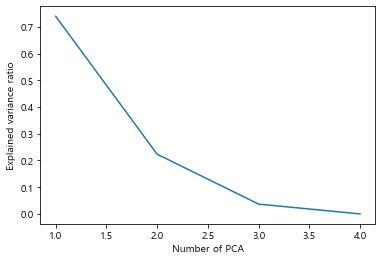

In [118]:
plt.plot(np.arange(1,5), pca1.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [119]:
pca = PCA()
x_new_pca = pd.DataFrame(pca.fit_transform(x_train[list(importance_df.query('shap_importance > 0.07').column_name)]))
x_te_new_pca = pd.DataFrame(pca.transform(x_test[list(importance_df.query('shap_importance > 0.07').column_name)]))

### clustering

In [120]:
# 군집의 개수는 임의로 정했다.
# random seed를 고정안하는 실수로 완벽하게 복구가 안됨.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20)

In [122]:
# 앞에서 구한 PCA 열들만 가지고 clustering을 진행한다.

train_km = km.fit_predict(x_new_pca)
test_km = km.predict(x_te_new_pca)

In [134]:
pd.DataFrame(train_km).rename(columns={0:'cl'}).cl.value_counts()

0     65877
18    49045
11    36582
9     35557
8     33115
3     32493
1     30410
7     26817
2     25571
4     25336
6     21121
16    20885
10    18422
13    17118
15    15225
14    15050
5     10869
17     9019
19     8134
12     5305
Name: cl, dtype: int64

In [135]:
pd.DataFrame(test_km).rename(columns={0:'cl'}).cl.value_counts()

0     6257
18    4357
9     3354
11    3225
8     3183
3     3090
1     2584
7     2544
4     2297
2     2221
10    1956
6     1934
16    1914
13    1509
14    1447
15    1331
5     1031
17     912
19     785
12     473
Name: cl, dtype: int64

In [136]:
x_train['cluster1'] = train_km
x_test['cluster1'] = test_km

### feature selection

In [146]:
cat_features = x_train.columns[x_train.nunique() > 2].tolist()
cat_features = list(set(cat_features) - set(['content_L_code_sum', 'person_prefer_mul', 
                                             'contents_attribute_mul', 'prefer_attribute_com',
                                             'D_H_1_mul', 'D_H_2_mul', 'D_H_3_mul',
                                             'D_H_1_sum', 'D_H_2_sum', 'D_H_3_sum',
                                             ]))

In [147]:
model = CatBoostClassifier(random_state=SEED, eval_metric="F1", cat_features=cat_features, one_hot_max_size=4, verbose=100)

In [148]:
x_train[num_features] = x_train[num_features].astype(float)
x_train[cat_features] = x_train[cat_features].astype(str)

x_test[num_features] = x_test[num_features].astype(float)
x_test[cat_features] = x_test[cat_features].astype(str)

In [149]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold='median')
sfm.fit(x_train, y_train)
x_new = sfm.transform(x_train)
x_te_new = sfm.transform(x_test)
feature_idx = sfm.get_support()
feature_name = x_train.columns[feature_idx]

Learning rate set to 0.146594
0:	learn: 0.6068367	total: 4.07s	remaining: 1h 7m 45s
100:	learn: 0.6696198	total: 8m 15s	remaining: 1h 13m 31s
200:	learn: 0.6768241	total: 16m 42s	remaining: 1h 6m 23s
300:	learn: 0.6794433	total: 24m 54s	remaining: 57m 49s
400:	learn: 0.6816574	total: 33m 5s	remaining: 49m 25s
500:	learn: 0.6838202	total: 42m 3s	remaining: 41m 53s
600:	learn: 0.6855792	total: 51m 11s	remaining: 33m 59s
700:	learn: 0.6870131	total: 1h 20s	remaining: 25m 44s
800:	learn: 0.6882999	total: 1h 9m 36s	remaining: 17m 17s
900:	learn: 0.6898486	total: 1h 18m 29s	remaining: 8m 37s
999:	learn: 0.6910712	total: 1h 27m 28s	remaining: 0us


In [150]:
x_new = pd.DataFrame(x_new)
x_te_new = pd.DataFrame(x_te_new)

x_new.columns = feature_name
x_te_new.columns = feature_name

In [151]:
x_new.columns

Index(['person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_a', 'contents_attribute_j_1',
       'contents_attribute_c', 'contents_attribute_l', 'contents_attribute_d',
       'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h',
       'contents_open_hour', 'person_prefer_d_1_attribute_d_d',
       'person_prefer_d_1_attribute_d_s', 'person_prefer_d_1_attribute_d_m',
       'person_prefer_d_1_attribute_d_l', 'person_prefer_d_2_attribute_d_d',
       'person_prefer_d_2_attribute_d_s', 'person_prefer_d_2_attribute_d_m',
       'person_prefer_d_2_attribute_d_l', 'person_prefer_d_3_attribute_d_d',
       'person_prefer_d_3_attribute_d_s', 'contents_attribute_d_attribute_d_d',
       'contents_attribute_d_attribute_d_s',
       'contents_attribute_d_attribute_d_m',
       'cont

In [152]:
cat_features = x_new.columns[x_new.nunique() > 2].tolist()
cat_features = list(set(cat_features) - set(['content_L_code_sum', 
                                             'contents_attribute_mul',
                                             'D_H_1_mul', 
                                             ]))

In [153]:
num_features = ['content_L_code_sum', 
                                             'contents_attribute_mul',
                                             'D_H_1_mul', 
                                             ]

In [154]:
x_new.shape

(501951, 63)

### 학습 파라미터

In [155]:
is_holdout = False
n_splits = 5
iterations = 3000
patience = 100

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

### 학습

In [159]:
cat_features = x_new.select_dtypes(include=['object','category']).columns.to_list()
num_features = x_new.select_dtypes(exclude=['object','category']).columns.to_list()

In [173]:
x_new[num_features] = x_new[num_features].astype(float)
x_new[cat_features] = x_new[cat_features].astype(str)

x_te_new[num_features] = x_te_new[num_features].astype(float)
x_te_new[cat_features] = x_te_new[cat_features].astype(str)

In [174]:
# selection 한 모델
scores = []
models = []

for tri, vai in cv.split(x_new):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations, 
                               random_state=SEED,
                               #task_type="GPU",
                               eval_metric="F1",
                               cat_features=cat_features,
                               one_hot_max_size=4)
    model.fit(x_new.iloc[tri], y_train[tri], 
            eval_set=[(x_new.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience,
            verbose=100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

Learning rate set to 0.086395
0:	learn: 0.6365840	test: 0.6364862	best: 0.6364862 (0)	total: 2.65s	remaining: 2h 12m 30s
100:	learn: 0.6583501	test: 0.6854433	best: 0.6854433 (100)	total: 5m 39s	remaining: 2h 42m 32s
200:	learn: 0.6658912	test: 0.6920545	best: 0.6921195 (199)	total: 11m 12s	remaining: 2h 36m 6s
300:	learn: 0.6702596	test: 0.6939216	best: 0.6941323 (279)	total: 16m 58s	remaining: 2h 32m 14s
400:	learn: 0.6731973	test: 0.6951032	best: 0.6952338 (386)	total: 22m 59s	remaining: 2h 28m 59s
500:	learn: 0.6750560	test: 0.6951682	best: 0.6955369 (492)	total: 28m 57s	remaining: 2h 24m 25s
600:	learn: 0.6767701	test: 0.6956822	best: 0.6958519 (558)	total: 34m 59s	remaining: 2h 19m 40s
700:	learn: 0.6780208	test: 0.6958490	best: 0.6960357 (641)	total: 40m 47s	remaining: 2h 13m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6960356539
bestIteration = 641

Shrink model to first 642 iterations.
Learning rate set to 0.086395
0:	learn: 0.6057762	test: 0.60881

---

---

### cv 결과 확인

In [175]:
print(scores)
print(np.mean(scores))

[0.6960356538881984, 0.6933190485588354, 0.6910361764428071, 0.6927799491981367, 0.6910787874226144]
0.6928499231021183


### threshold 정의

In [176]:
threshold = 0.375

### threshold값 변경에 따른 검증점수 확인 및 추론

In [178]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_new) ):
    pred = models[i].predict_proba(x_new.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_te_new)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))
#0.7159527624859094

[0.7174399593644343, 0.7166020584419203, 0.7166362851386358, 0.7160560516030631, 0.7143186828053254]
0.7162106074706758


### 산술평균 앙상블

In [179]:
pred = np.mean(pred_list, axis=0)
pred = np.where(pred >= threshold, 1, 0)

### submission

In [180]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = pred
sample_submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [181]:
sample_submission['target'].value_counts()

1    34308
0    12096
Name: target, dtype: int64

In [182]:
sample_submission.to_csv("ks_220127_0501.csv", index=False)

In [ ]:
(pd.DataFrame(pred_list).T).to_csv('ks_220127_0501_proba.csv', index=False)